# Download NLVR2

In [1]:
# Download Images
!wget http://clic.nlp.cornell.edu/resources/NLVR2/train_img.zip

--2019-04-13 08:22:11--  http://clic.nlp.cornell.edu/resources/NLVR2/train_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10963360551 (10G) [application/zip]
Saving to: ‘train_img.zip’

train_img.zip       100%[===================>]  10.21G  70.3MB/s    in 2m 23s  

2019-04-13 08:24:34 (73.1 MB/s) - ‘train_img.zip’ saved [10963360551/10963360551]



In [2]:
!wget http://clic.nlp.cornell.edu/resources/NLVR2/dev_img.zip

--2019-04-13 08:29:58--  http://clic.nlp.cornell.edu/resources/NLVR2/dev_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846824822 (808M) [application/zip]
Saving to: ‘dev_img.zip’

dev_img.zip         100%[===================>] 807.59M  75.5MB/s    in 12s     

2019-04-13 08:30:11 (65.5 MB/s) - ‘dev_img.zip’ saved [846824822/846824822]



In [3]:
!wget http://clic.nlp.cornell.edu/resources/NLVR2/test1_img.zip

--2019-04-13 08:41:37--  http://clic.nlp.cornell.edu/resources/NLVR2/test1_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846345997 (807M) [application/zip]
Saving to: ‘test1_img.zip’

test1_img.zip       100%[===================>] 807.14M  76.8MB/s    in 12s     

2019-04-13 08:41:49 (64.7 MB/s) - ‘test1_img.zip’ saved [846345997/846345997]



In [0]:
# Unzip Files
!unzip -q train_img.zip

In [0]:
!unzip -q dev_img.zip

In [0]:
!unzip -q test1_img.zip

In [7]:
# JSON NLVR Training data
!wget https://raw.githubusercontent.com/clic-lab/nlvr/master/nlvr2/data/train.json

--2019-04-13 08:55:40--  https://raw.githubusercontent.com/clic-lab/nlvr/master/nlvr2/data/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40735513 (39M) [text/plain]
Saving to: ‘train.json’

train.json          100%[===================>]  38.85M   170MB/s    in 0.2s    

2019-04-13 08:55:41 (170 MB/s) - ‘train.json’ saved [40735513/40735513]



# Train dataset NLVR2

In [0]:
import pandas as pd

In [0]:
# Datafreame Pandas
df = pd.read_json('train.json', lines=True)
identifier_df = df['identifier'].str.extract('(?P<set_id>\d{1,})-(?P<pair_id>\d)-(?P<sentence_id>\d)', expand=True)
df['set_id'] = identifier_df['set_id']
df['pair_id'] = identifier_df['pair_id']
df['sentence_id'] = identifier_df['sentence_id']

# Yolo v3 demo

## Yolo config

In [10]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.


In [11]:
cd darknet

/content/darknet


In [12]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [13]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-04-13 08:58:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  71.8MB/s    in 3.5s    

2019-04-13 08:58:37 (67.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
from IPython.display import Image

## Take one sample of the training set

In [0]:
import sys, os, fnmatch
from PIL import Image, ImageOps

def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [0]:
# Take one sample
sample = df.sample()

# sample_values : pandas.core.series.Series
sample_values = sample.iloc[0]
sample_set_id = sample_values['set_id']
sample_pair_id = sample_values['pair_id']
sample_sentence_id = sample_values['sentence_id']
sample_lookup = '*-' + sample_set_id + '-' + sample_pair_id + '*'

# Image Lookup
sample_path_0 = find(sample_lookup, '../images')[0]
sample_path_1 = find(sample_lookup, '../images')[1]
sample_sentence = sample['sentence'].iloc[0]
sample_label = sample['label'].iloc[0]

# img0, img1 : IPython.core.display.Image
img_0 = Image.open(sample_path_0)
img_1 = Image.open(sample_path_1)

# Resize like when displayed to the workers during sentence-writing
size = (530, 416)
left_im = ImageOps.fit(img_0, size, Image.ANTIALIAS)
right_im = ImageOps.fit(img_1, size, Image.ANTIALIAS)

images = [left_im, right_im]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

# pair_im : PIL.Image.Image
pair_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  pair_im.paste(im, (x_offset,0))
  x_offset += 1+im.size[0]
  
pair_im.save('data/pair_im.jpg')
left_im.save('data/left_im.jpg')
right_im.save('data/right_im.jpg')

## Yolo run

One of the images shows humans inside the shop.


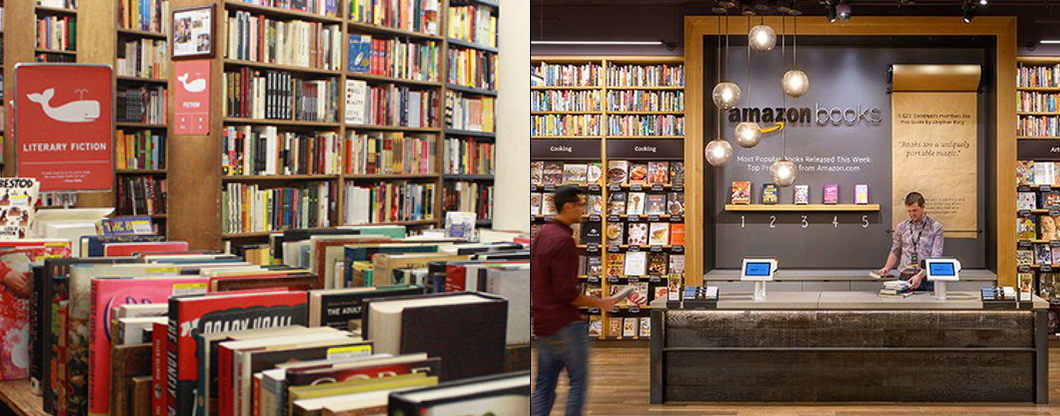

In [17]:
# Print sentence and image pair
print(sample_sentence)
pair_im

In [18]:
# Print label
print(sample_label)

True


In [23]:
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/pair_im.jpg
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/left_im.jpg
!./darknet detect cfg/yolov3.cfg yolov3.weights data/right_im.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

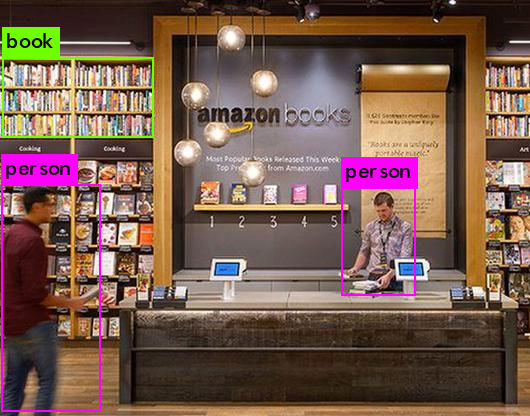

In [24]:
from IPython.display import Image
Image(filename="predictions.jpg")